<a href="https://colab.research.google.com/github/faridrizqi46/CNN/blob/main/Cifar10_Image_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)


In [ ]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


The label is: [6]


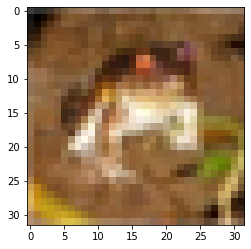

In [ ]:
import matplotlib.pyplot as plt

img = plt.imshow(X_train[0])
img
print('The label is:', y_train[0])

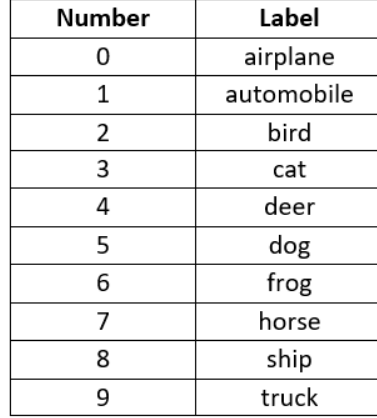

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train_one_hot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

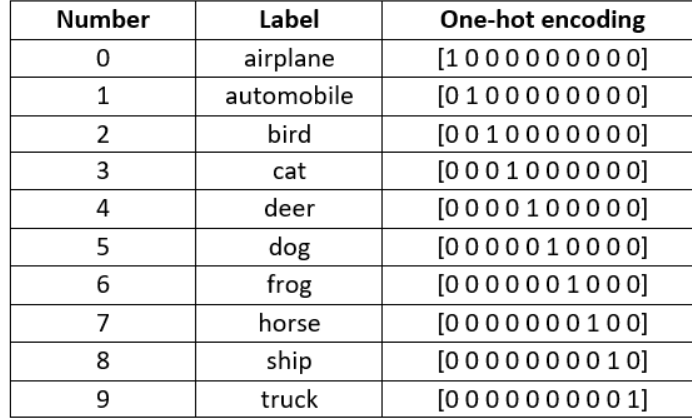

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception,InceptionV3,InceptionResNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import glob
import numpy as np

In [ ]:
bModel = InceptionResNetV2(include_top=False,weights='imagenet',input_tensor=Input(shape=(32,32,3)))
bModel.summary()

In [ ]:
hModel = bModel.output
hModel = Flatten()(hModel)
hModel = Dense(128,activation='relu')(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(10,activation='softmax')(hModel)

model = Model(bModel.input,hModel)

In [ ]:
for layer in bModel.layers:
  layer.trainable=False

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 15, 15, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 15, 15, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 15, 15, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train,y_train_one_hot,
                 batch_size=32,epochs=30,
                 validation_split=0.2)

Epoch 1/30
1250/1250 [==============================] - 22s 11ms/step - loss: 2.0688 - accuracy: 0.2808 - val_loss: 1.7433 - val_accuracy: 0.4000
Epoch 2/30
1250/1250 [==============================] - 12s 10ms/step - loss: 1.7389 - accuracy: 0.3951 - val_loss: 1.6552 - val_accuracy: 0.4289
Epoch 3/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.6452 - accuracy: 0.4247 - val_loss: 1.6173 - val_accuracy: 0.4396
Epoch 4/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5842 - accuracy: 0.4444 - val_loss: 1.5908 - val_accuracy: 0.4430
Epoch 5/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5412 - accuracy: 0.4529 - val_loss: 1.5795 - val_accuracy: 0.4465
Epoch 6/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5150 - accuracy: 0.4664 - val_loss: 1.5684 - val_accuracy: 0.4476
Epoch 7/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.4736 - accuracy: 0.4804 - val_loss: 1.5648 -

KeyboardInterrupt: ignored

In [ ]:
my_image = plt.imread("frog.jpg")

In [ ]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

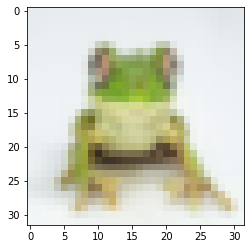

In [ ]:
img = plt.imshow(my_image_resized)

In [ ]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [ ]:
probabilities

array([[3.2043314e-04, 2.6421708e-07, 1.1820979e-01, 1.3483453e-03,
        3.9991873e-04, 5.9496402e-04, 8.7803513e-01, 2.4083709e-05,
        1.0263619e-03, 4.0790699e-05]], dtype=float32)

In [ ]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: frog -- Probability: 0.8780351
Second most likely class: bird -- Probability: 0.11820979
Third most likely class: cat -- Probability: 0.0013483453
Fourth most likely class: ship -- Probability: 0.001026362
Fifth most likely class: dog -- Probability: 0.000594964
